# K-Means Clustering Verfahren

## Definition:

Der K-Means Algorithmus ist ein unüberwachtes Lernverfahren (Unsupervised Learning algorithm) welches die unsortierten Daten in k-definierte Cluster einteilt, die nur Datensätze mit ähnlichen Attributen besitzen.

Es ist ein Centroid basiertes Verfahren, welches das Ziel verfolgt die Distanz zwischen den Datenpunkten innerhalb der Cluster zu minimieren.

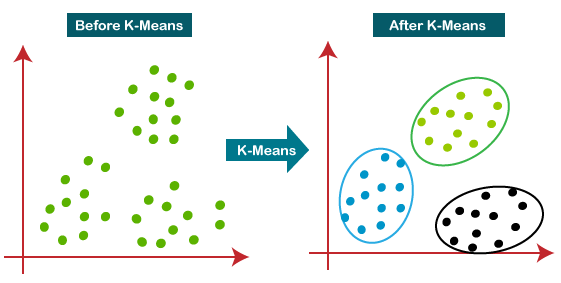

#### Der K-Means Algorithmus verrichtet im Grunde nur 2 Aufgaben:
    -Bestimmt die beste Anzahl an Centroiden
    -Weißt jeden Datensatz zu seinem nähsten Centroid zu und erstellt dadurch Cluster
  
  
## Unsupervised Learning/Unüberwachtes Lernen Definition:

Es wird versucht mithilfe der Eingabedaten Muster zu erkennen ohne im Voraus bekannte Zielwerte oder Belohnungen zu setzen.

Centroid based clustering Definition:

Centroid basierende Algorithmen erstellen Cluster ohne eine hierarchische Struktur und setzen jeden Datensatz an seinen nächst nahestehenden Centroid wie in der Abbildung unten zu erkennen.

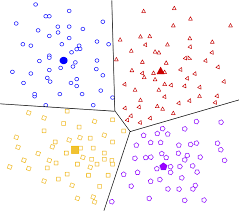


## Wie wird die Anzahl der Cluster (K) gewählt?:

#### Die bekannteste Methode zur Berechnung von K ist die "Elbow Method":

Sie wird mithhilfe des WCSS(Within Cluster Sum of Squares) Werts berechnet, welche die Anzahl an Variationen in einem Cluster angibt.

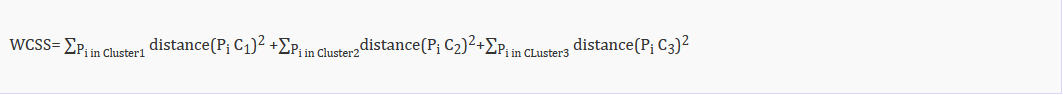

Das obere Schaubild berechnet das WCSS für 3 Cluster.

#### Um K optimal bestimmen zu können nutzt die Elbow Methode folgende Schritte:
   1. Der K-means Clustering algorithmus für verschiedene K Werte zwischen 1-10 ausgeführt
   2. Für jedes K wird der WCSS Wert berechnet
   3. Plotet eine Kurve zwischen den berehcneten WCSS Werten und der Anzahl an Clustern
   4. Der Knick in der Kurve, welcher wie ein Ellenbogen aussieht ist der beste K-Wert

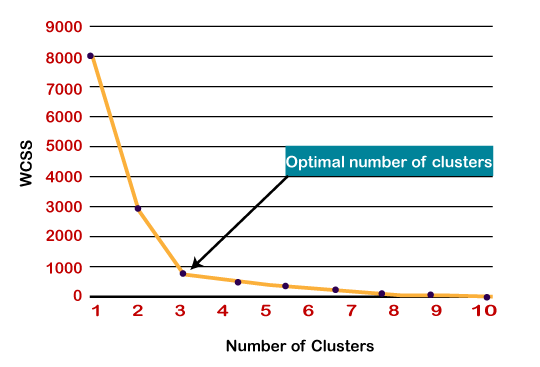

## Funktionsweise K-Means Clustering:

Im folgenden Beispiel wird der K-Means Algorithmus beschrieben und es wird mit einem K von 2 gearbeitet.


Zuerst wird für jedes K ein zufälliger Centroid gewählt, es kann ein zufälliger Punkt oder die gleichen Koordinaten wie ein Datenpunkt sein. 

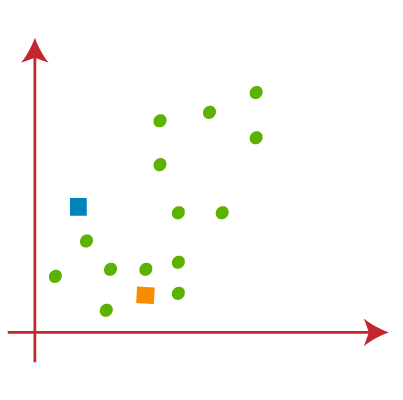


Nun werden alle Datenpunkte dem nächst nahestenden Centroid zugeordnet. Anschließend wird eine Linie (Median) zwischen beiden Centroiden gezeichnet um die Grenze zu kennzeichnen welcher Datenpunkt zu welchem Centroid gehört.

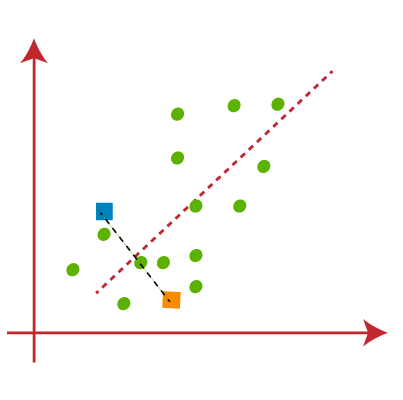


In dem Schritt wird der Durchscnitt aller Datenpunkte (Center of Gravity) berechnet und der Centroid dahin verschoben

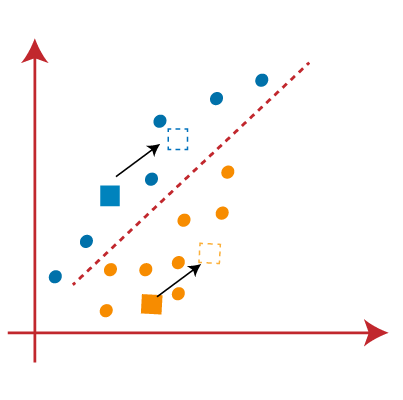


Jeder Datenpunkt wird wieder neu zu dem Centroid mit dem geringsten Abstand zugewiesen und der Median wird neu gezeichnet

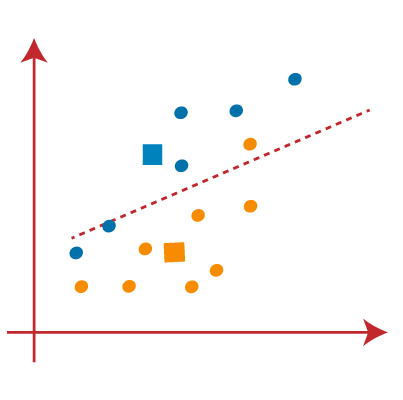


Datenpunkte die auf der anderen Seite der Linie zu sehen sind werden zu neuem Centroid zugewiesen

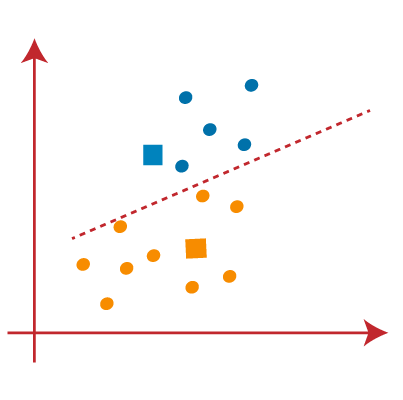


Der vorher beschriebene Prozess wird nun so lange weiter durchgeführt bis kein wechseln von Datenpunktne mehr stattfindet und der Centroid damit seine optimale position gefunden hat.

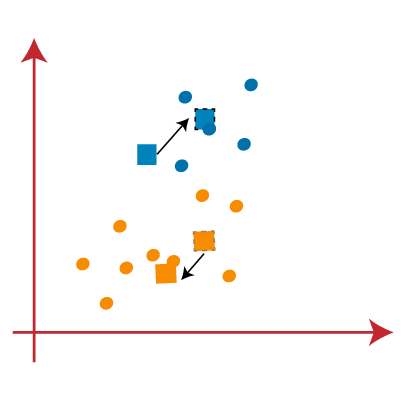


Es findet kein neuzuweisung von Datenpunkten zu Centroiden statt.

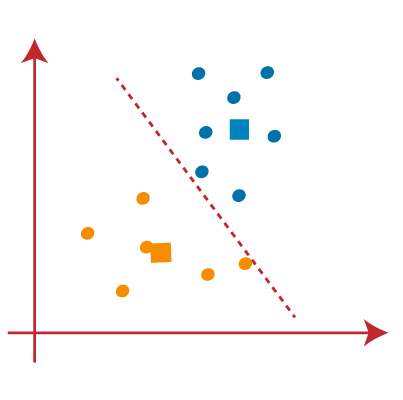


Das Cluster ist nun fertig.

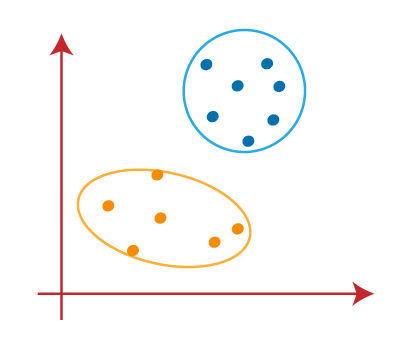

## Codebeispiel:

#### Clusteranalyse zur Kundensementierung

#### Ziel: Anhand von Kundenmerkmalen der "Mall" Kundengruppen kategorisieren (Clusterbildung in den sich die Cluster außerhalb deutlich unterscheiden und innen recht ähnlich sind)

### Diagramme/Schaubilder zum besseren Verständnis der CSV Datei: 

In [2]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# Daten einlesen
df = pd.read_csv('Mall_Customers.csv')
 
# Zeige ersten 5 Zeilen
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


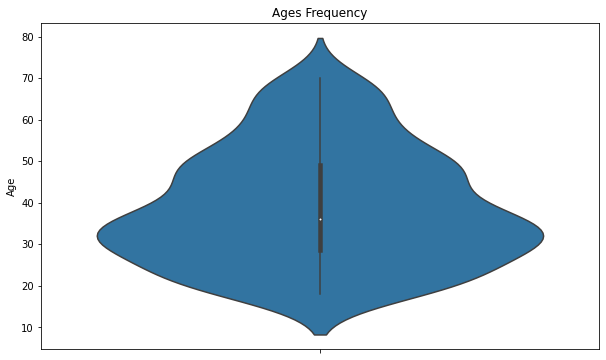

In [3]:
df.drop(["CustomerID"], axis = 1, inplace=True)
 
# Altersverteilung plotten
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"]);

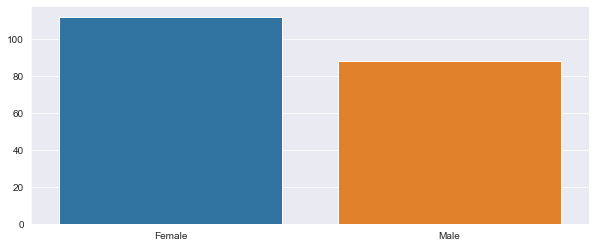

In [4]:
# Verteilung des Geschlechts plotten
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values);



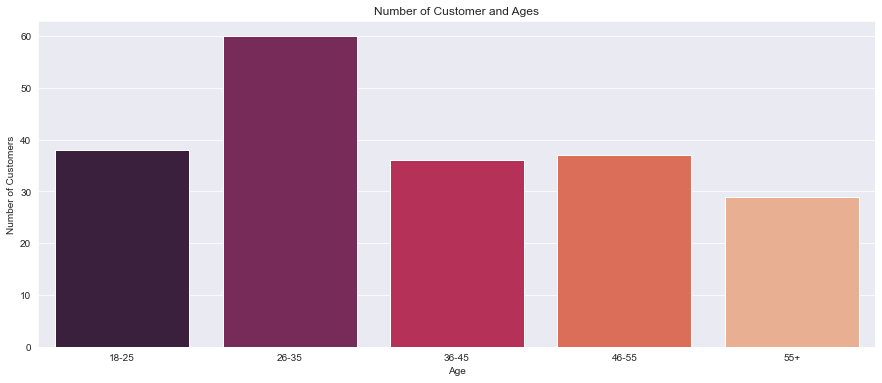

In [5]:
# Altersverteilung plotten
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]
 
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
 
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers");

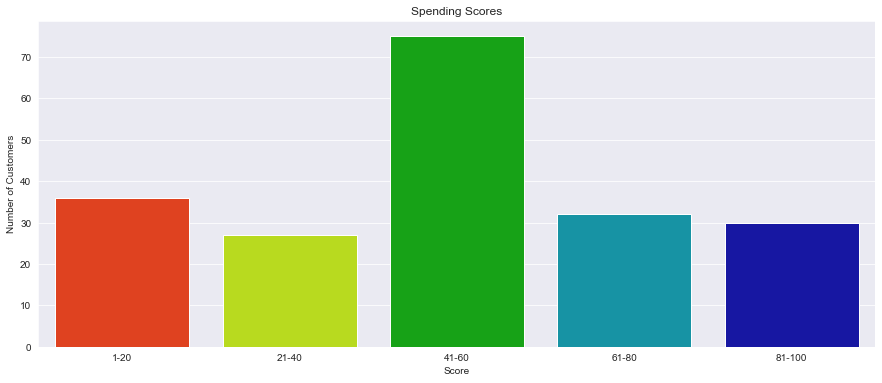

In [6]:
# Spending Score plotten
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]
 
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]
 
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers");

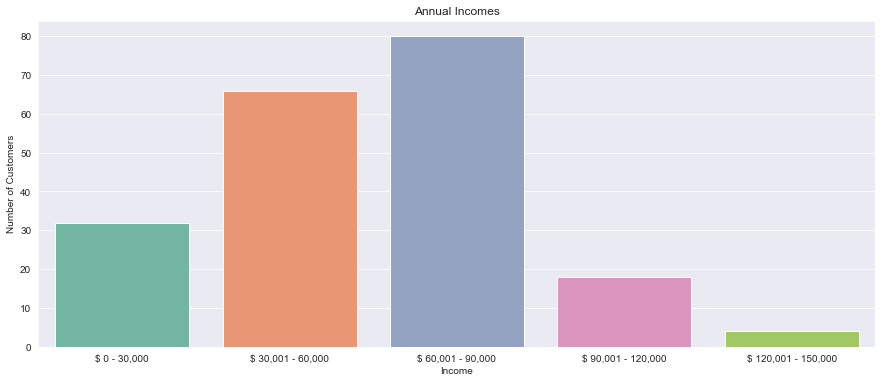

In [7]:
# Jahreseinkommen plotten
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]
 
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
 
plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customers");

## Code:

In [8]:
# Auswahl der Clustering-Parameter und Standardisierung der Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X = scaler.fit_transform(X)

### K-Means Algorithmus um optimale Anzahl von Clustern herauszufinden

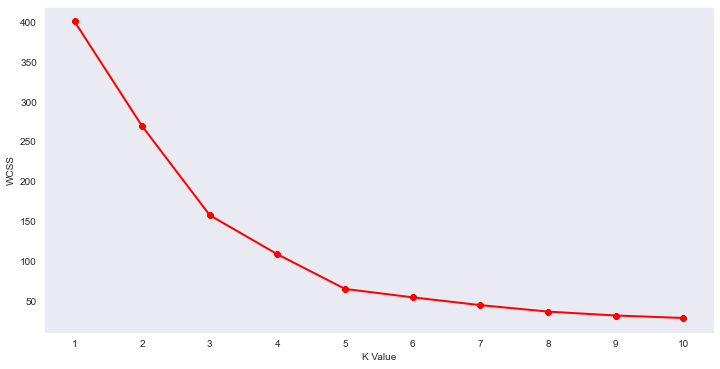

In [9]:
#Clusteranalyse mit K-Means
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS");

### Um beste Anzahl der Cluster auszuwählen wird die Elbow-Methode angewendet, man schaut wo die Kurven einen Knick macht und der Gewinn an zusätzlichen Clustern nicht mehr so groß ist.

In [10]:
# Auswahl der Cluster-Zahl nach Elbow-Methode: 5 Cluster
# Trainiert das K-means Modell mit dem Datensatz 
km = KMeans(n_clusters=5, random_state=42)
clusters = km.fit_predict(X)
df["label"] = clusters

#### Labels zum besseren Verständnis der Grafik

In [11]:
labels = ['WenigGeld/VielAusgaben', 'DurchsnittlichGeld/DurchschnittlichAusgaben', 'Wohlhabend/WenigAusgaben', 'WenigGeld/WenigAusgaben', 'Wohlhabend/VielAusgaben']

### Plotten der Clustergrafik

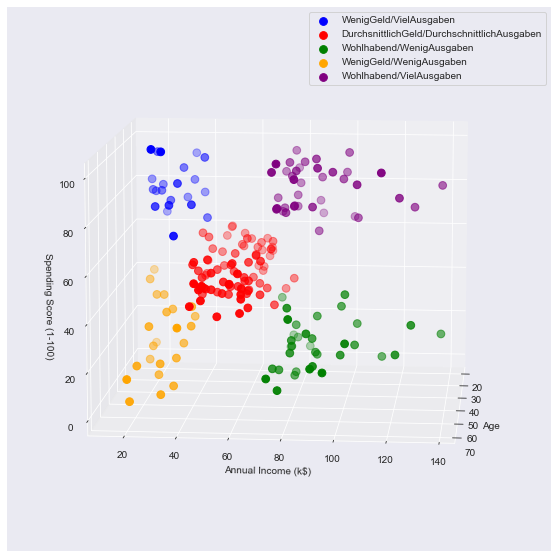

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60, label=labels[0])
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60, label=labels[1])
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60, label=labels[2])
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60, label=labels[3])
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60, label=labels[4])
ax.view_init(10, 5)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)');
plt.legend()

## Quellen:
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

https://www.youtube.com/watch?v=40CiBaq1NcI

https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning

https://de.wikipedia.org/wiki/Un%C3%BCberwachtes_Lernen

https://developers.google.com/machine-learning/clustering/clustering-algorithms

https://www.youtube.com/watch?v=_aWzGGNrcic

In [13]:
pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext watermark

%watermark -v -m -p wget,pandas,numpy,geopy,altair,vega,vega_datasets,watermark

print(" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

wget         : not installed
pandas       : 1.1.3
numpy        : 1.19.2
geopy        : not installed
altair       : not installed
vega         : not installed
vega_datasets: not installed
watermark    : 2.2.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Thu Jul 01 2021 21:18:29Mitteleuropäische Sommerzeit

